In [1]:
import pandas as pd
from datetime import datetime

from pmdarima.arima.utils import ndiffs, nsdiffs
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt

In [2]:
path = f"/masters_diploma/processed_data/history_weather_with_daylight.csv"

full_set = pd.read_csv(
    path,
    parse_dates=["date"],
    index_col=["date"],
)

In [3]:
full_set

,temperature,relative_humidity,dew_point,precipitation,rain,snowfall,weather_code,pressure_msl,surface_pressure,cloud_cover,...,sunshine_duration_mean_3_years,sunshine_duration_max_4_years,sunshine_duration_min_4_years,sunshine_duration_mean_4_years,sunshine_duration_lag_24,sunshine_duration_lag_48,sunshine_duration_lag_72,sunshine_duration_lag_168,daylight_seconds,dark_seconds
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,-5.9,56.0,-13.3,0.0,0.0,0.07,71.0,1026.1,1001.8,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3600
2015-01-01 01:00:00,-5.5,59.0,-12.4,0.0,0.0,0.00,3.0,1025.1,1000.8,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3600
2015-01-01 02:00:00,-5.2,63.0,-11.2,0.0,0.0,0.00,3.0,1024.7,1000.5,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3600
2015-01-01 03:00:00,-4.9,68.0,-9.9,0.0,0.0,0.00,3.0,1024.3,1000.1,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3600
2015-01-01 04:00:00,-4.6,73.0,-8.7,0.0,0.0,0.07,71.0,1024.1,1000.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-25 19:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3600
2025-09-25 20:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3600
2025-09-25 21:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3600


In [24]:
temp = full_set['temperature']
exog = full_set[['month', 'week_day', 'year_day', 'is_day', 'daylight_seconds', 'temperature_min_3_weeks', 'temperature_max_3_weeks', 'temperature_mean_3_weeks',
         'temperature_min_3_years', 'temperature_max_3_years', 'temperature_mean_3_years'
#                  , 'cloud_cover_mean_7_days', 'pressure_msl_mean_7_days'
                ]]

temp = temp.asfreq(pd.infer_freq(temp.index) or "H")
exog = exog.reindex(temp.index).interpolate(limit_direction="both")

In [56]:
train_start = datetime(2023, 9, 1, 0)
train_end = datetime(2025, 9, 11, 23)
test_start = datetime(2025, 9, 12, 0)
test_end = datetime(2025, 9, 14, 23)

In [57]:
X_train = exog.loc[train_start: train_end]
X_test = exog.loc[test_start: test_end]

y_train = temp.loc[train_start: train_end]
y_test = temp.loc[test_start: test_end]

In [ ]:
# d = ndiffs(temp, alpha=0.05, test='kpss')
# D = nsdiffs(temp, m=24, max_D=1, test='ocsb') 

# d, D

In [ ]:
# model_arima = ARIMA(y_train, order=(2, 1, 3))
# result_arima = model_arima.fit()

# ar_forecast = result_arima.forecast(steps=len(y_test))

In [58]:
model_sarimax = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 0, 1, 24))
result_sarimax = model_sarimax.fit(disp=False)

sar_forecast = result_sarimax.get_forecast(steps=len(y_test), exog=X_test).predicted_mean

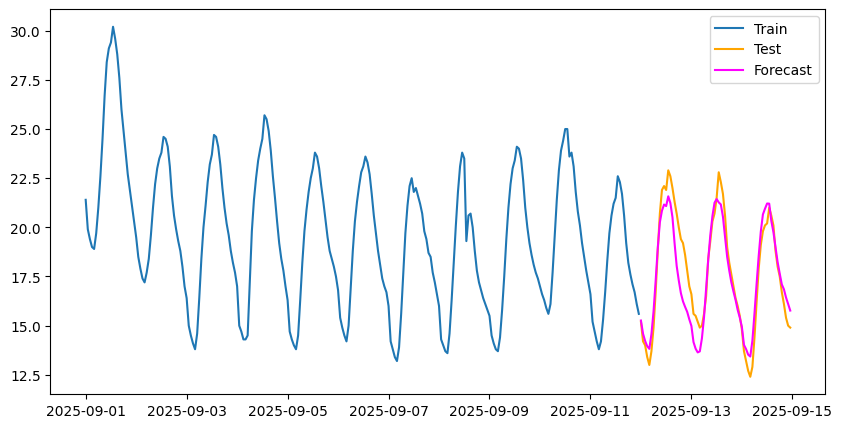

In [59]:
plt.figure(figsize=(10,5))
plt.plot(y_train.loc['2025-09-01':], label="Train")
plt.plot(y_test, label="Test", color="orange")
# plt.plot(ar_forecast, label="Forecast", color="red")
plt.plot(sar_forecast, label="Forecast", color="magenta")
plt.legend()
plt.show()

In [ ]:
# subset = pd.concat([
#     full_set.loc["2024-01-01":"2024-01-01 23:00", ["is_day", "sunshine_duration"]],
#     full_set.loc["2025-01-01":"2025-01-01 23:00", ["is_day", "sunshine_duration"]]
# ])
# subset

In [61]:
_ = round(pd.concat([y_test, sar_forecast], axis=1))
_['diff'] = round(_['temperature'] - _['predicted_mean'], 2)
_['rel_err'] = round(_['predicted_mean']/_['temperature'] - 1, 2)*100

_.iloc[24:48]

,temperature,predicted_mean,diff,rel_err
2025-09-13 00:00:00,17.0,15.0,2.0,-12.0
2025-09-13 01:00:00,16.0,14.0,2.0,-12.0
2025-09-13 02:00:00,16.0,14.0,2.0,-12.0
2025-09-13 03:00:00,15.0,14.0,1.0,-7.0
2025-09-13 04:00:00,15.0,14.0,1.0,-7.0
2025-09-13 05:00:00,15.0,14.0,1.0,-7.0
2025-09-13 06:00:00,16.0,15.0,1.0,-6.0
2025-09-13 07:00:00,16.0,17.0,-1.0,6.0
2025-09-13 08:00:00,18.0,18.0,0.0,0.0
2025-09-13 09:00:00,19.0,20.0,-1.0,5.0


In [62]:
import pandas as pd
import numpy as np
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [67]:
# ====== Load and prepare data ======
path = "/masters_diploma/processed_data/history_weather_with_daylight.csv"

full_set = pd.read_csv(
    path,
    parse_dates=["date"],
    index_col="date"
)

# Target and features
y = full_set["temperature"]
X = full_set[[
    "month", "year_day", "is_day", 'week_day', "daylight_seconds"
    , "temperature_min_3_weeks", "temperature_max_3_weeks", "temperature_mean_3_weeks"
    , "temperature_min_3_years", "temperature_max_3_years", "temperature_mean_3_years"
#     , "cloud_cover_mean_7_days", "pressure_msl_mean_7_days"
]]

# Ensure frequency and fill missing values
X = X.asfreq("h").interpolate()
y = y.asfreq("h").interpolate()

# ====== Split into train/test ======
train_start = datetime(2023, 9, 1, 0)
train_end   = datetime(2025, 9, 11, 23)
test_start  = datetime(2025, 9, 12, 0)
test_end    = datetime(2025, 9, 14, 23)

X_train = X.loc[train_start:train_end]
y_train = y.loc[train_start:train_end]
X_test  = X.loc[test_start:test_end]
y_test  = y.loc[test_start:test_end]

# ====== Scale features ======
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ====== Build a simple neural net ======
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse")

# ====== Train ======
model.fit(X_train_scaled, y_train, epochs=30, verbose=0)

# ====== Forecast the next 7 days (hourly) ======
y_pred = model.predict(X_test_scaled).flatten()

# ====== Compare results ======
result = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred, 
    "err": np.round(y_test.values - y_pred, 2)
}, index=y_test.index)

print(result)  # first 24 hours
print("MAE:", mean_absolute_error(y_test, y_pred))

3/3 [==============================] - 0s 6ms/step
                     Actual  Predicted   err
date                                        
2025-09-12 00:00:00    15.0       16.0 -1.06
2025-09-12 01:00:00    14.0       16.0 -2.06
2025-09-12 02:00:00    14.0       16.0 -2.08
2025-09-12 03:00:00    13.0       16.0 -2.61
2025-09-12 04:00:00    13.0       16.0 -2.62
...                     ...        ...   ...
2025-09-14 19:00:00    17.0       19.0 -2.77
2025-09-14 20:00:00    16.0       20.0 -3.40
2025-09-14 21:00:00    15.0       19.0 -3.90
2025-09-14 22:00:00    15.0       19.0 -4.17
2025-09-14 23:00:00    15.0       19.0 -4.02

[72 rows x 3 columns]
MAE: 1.9339033550686306


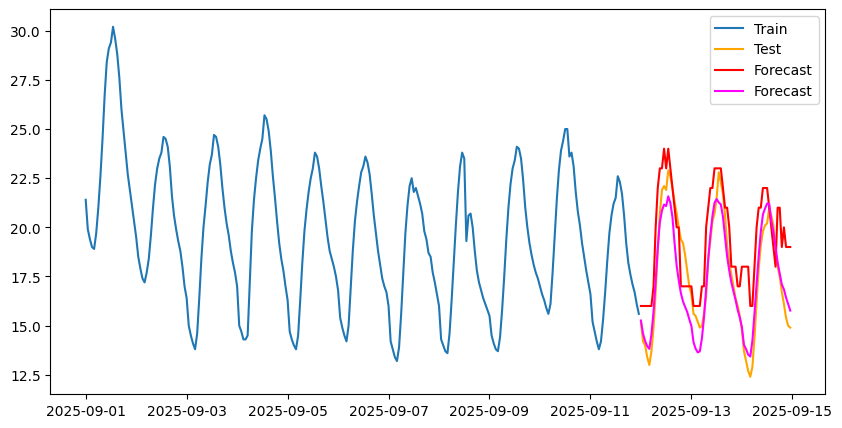

In [70]:
plt.figure(figsize=(10,5))
plt.plot(y_train.loc['2025-09-01':], label="Train")
plt.plot(y_test, label="Test", color="orange")
plt.plot(result["Predicted"], label="Forecast", color="red")
plt.plot(sar_forecast, label="Forecast", color="magenta")
plt.legend()
plt.show()

In [69]:
y_pred

array([16.255548, 16.260935, 16.078566, 16.012873, 15.617106, 16.09069 ,
       17.26142 , 20.399035, 21.646986, 22.550611, 23.38157 , 23.719912,
       23.465553, 23.527292, 23.341982, 22.409754, 21.065594, 20.2484  ,
       19.91765 , 17.37684 , 17.413733, 17.126766, 16.942753, 16.829336,
       16.695166, 16.372416, 16.297468, 16.21044 , 16.125181, 16.511854,
       17.24864 , 20.12697 , 21.133776, 21.947897, 22.487368, 23.04416 ,
       23.404848, 22.564016, 22.646904, 21.951862, 20.754   , 20.791424,
       20.465433, 18.259096, 18.214958, 17.80853 , 17.348358, 17.401762,
       17.803066, 17.556314, 17.610098, 17.637178, 15.896054, 16.456789,
       17.610575, 19.801065, 20.691881, 21.415398, 21.82731 , 21.512491,
       21.883049, 20.972105, 19.752954, 19.212103, 18.281027, 21.444296,
       21.273125, 19.466963, 19.501825, 19.297039, 19.172775, 18.91868 ],
      dtype=float32)